In [77]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [78]:
import os

df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')
df = pd.read_csv('data/innovaid_hackathon_anima/total_gaze_imgs_4.csv')[1:]

In [79]:
df["Unnamed: 0"] = df["Unnamed: 0"].apply(lambda x: x.split(".")[0])
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
1,ykb8Kau47lOpf94ogXqW,0.016426,0.000000,0.019569,0.000000,0.021711,0.000000,0.021711,0.000000,0.020711,...,0.000000,0.018140,0.000000,0.020140,0.000000,0.010713,0.000000,0.008856,0.000000,0.222254
2,9kaeHX0tKCwDx3YTqtKa,0.002591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000797,...,0.001395,0.005780,0.000797,0.001196,0.002990,0.001794,0.004983,0.002392,0.001196,0.867251
3,UEGF9hSh8QZt8KSYiXWp,0.012531,0.001847,0.017016,0.000000,0.009102,0.002638,0.012268,0.001715,0.013323,...,0.000000,0.016357,0.000000,0.011212,0.000791,0.014510,0.000264,0.017544,0.000000,0.502176
4,6xXlQ54eY3eQmQK85PWZ,0.006188,0.004273,0.007072,0.004126,0.003831,0.008840,0.004273,0.008693,0.006778,...,0.006483,0.005157,0.005894,0.005452,0.005746,0.003389,0.003389,0.005010,0.006925,0.528363
5,rrU7PfbZjJ1PYPQfpsBC,0.004064,0.000000,0.009753,0.005690,0.008399,0.006773,0.000000,0.011650,0.000000,...,0.000271,0.003251,0.000000,0.002438,0.000000,0.007857,0.000000,0.000000,0.000000,0.733677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,Fu99kvYLObFdDEolQPJf,0.000000,0.008376,0.010840,0.003695,0.011086,0.005174,0.004927,0.006898,0.004927,...,0.000985,0.000985,0.002710,0.000000,0.000000,0.001232,0.000493,0.003449,0.000000,0.697709
1450,I8EwzZrIiWLe5SP2MLGv,0.009490,0.002052,0.013080,0.001539,0.010259,0.003847,0.004873,0.005386,0.004360,...,0.005130,0.003334,0.005642,0.001282,0.010003,0.002052,0.005899,0.005130,0.002821,0.454219
1451,FC07oWVDi4EJz1NPOTRw,0.008833,0.000000,0.008306,0.004351,0.003428,0.001450,0.005801,0.004878,0.006196,...,0.000132,0.007779,0.000000,0.005010,0.000264,0.002900,0.000000,0.005274,0.000000,0.708372
1452,Pf4Ae6IOVapo0dh6lNZX,0.006417,0.008289,0.009091,0.006016,0.004813,0.008824,0.010428,0.005749,0.010160,...,0.004278,0.008155,0.003342,0.010428,0.006283,0.009225,0.005348,0.001471,0.015241,0.460695


In [80]:
df_labels

,Unnamed: 0,sid,PHQ9,BDI,has_depression,depression_severity
0,0,phCuOQH98uz4GwmMIvb7,21,20,1,4
1,1,SsLnwVPamBVnth2xfvtP,18,31,1,3
2,2,Ro2d4ko1sbAXgymERH1v,11,20,1,2
3,3,SKyBynt433ddTJgyz6fL,5,5,0,1
4,4,YCstEssT38mPc9moNvOo,2,2,0,0
...,...,...,...,...,...,...
3097,3097,8OJGO9yVgXs6rZCg3dwp,18,19,1,3
3098,3098,0yffjwdfj51UTCr61FBj,22,27,1,4
3099,3099,Y2ekdlhBNm2dYKq5ycwI,15,16,1,3
3100,3100,gi5RnM4xFmFutnFKqxuY,17,21,1,3


In [81]:
df_labels_chunk = pd.merge(df[["Unnamed: 0"]], df_labels, "inner", left_on="Unnamed: 0", right_on="sid")
df_labels_chunk.drop(["Unnamed: 0_x", "Unnamed: 0_y"], inplace=True, axis=1)
df_labels_chunk

,sid,PHQ9,BDI,has_depression,depression_severity
0,ykb8Kau47lOpf94ogXqW,26,35,1,4
1,9kaeHX0tKCwDx3YTqtKa,10,28,1,2
2,UEGF9hSh8QZt8KSYiXWp,8,35,0,1
3,6xXlQ54eY3eQmQK85PWZ,23,38,1,4
4,rrU7PfbZjJ1PYPQfpsBC,14,12,1,2
...,...,...,...,...,...
1448,Fu99kvYLObFdDEolQPJf,14,10,1,2
1449,I8EwzZrIiWLe5SP2MLGv,8,16,0,1
1450,FC07oWVDi4EJz1NPOTRw,6,5,0,1
1451,Pf4Ae6IOVapo0dh6lNZX,17,15,1,3


In [82]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
X = df.to_numpy().reshape(-1, 101)
X

array([[1.64262248e-02, 0.00000000e+00, 1.95686331e-02, ...,
        8.85587773e-03, 0.00000000e+00, 2.22253964e-01],
       [2.59118995e-03, 0.00000000e+00, 0.00000000e+00, ...,
        2.39186765e-03, 1.19593382e-03, 8.67251345e-01],
       [1.25313283e-02, 1.84672207e-03, 1.70162248e-02, ...,
        1.75438596e-02, 0.00000000e+00, 5.02176494e-01],
       ...,
       [8.83322347e-03, 0.00000000e+00, 8.30586684e-03, ...,
        5.27356625e-03, 0.00000000e+00, 7.08371786e-01],
       [6.41711230e-03, 8.28877005e-03, 9.09090909e-03, ...,
        1.47058824e-03, 1.52406417e-02, 4.60695187e-01],
       [3.92054365e-04, 3.92054365e-04, 2.61369577e-04, ...,
        0.00000000e+00, 1.82958704e-03, 6.45452169e-01]])

In [83]:
y = df_labels_chunk["depression_severity"].to_numpy().flatten()
y

array([4, 2, 1, ..., 1, 3, 4])

In [84]:
len(X), len(y)

(1453, 1453)

In [85]:
import numpy as np

def balance_dataset(X, y, m):
    unique_classes, class_counts = np.unique(y, return_counts=True)

    # Find the minimum count across all classes
    min_count = min(class_counts)

    # Initialize lists to store the trimmed data and labels
    X_trimmed = []
    y_trimmed = []

    for cls in unique_classes:
        # Indices of the current class
        indices = np.where(y == cls)[0]

        # Trim the indices to have exactly 'm' occurrences
        trimmed_indices = np.random.choice(indices, size=min(m, len(indices)), replace=False)

        # Append the trimmed data and labels
        X_trimmed.append(X[trimmed_indices])
        y_trimmed.append(y[trimmed_indices])

    # Concatenate the trimmed data and labels
    X_trimmed = np.concatenate(X_trimmed)
    y_trimmed = np.concatenate(y_trimmed)

    return X_trimmed, y_trimmed

In [86]:
X_bal, y_bal = balance_dataset(np.asarray(X), np.asarray(y), 500)

In [87]:
len(X_bal), len(y_bal)

(1453, 1453)

---
## Multi-class classification

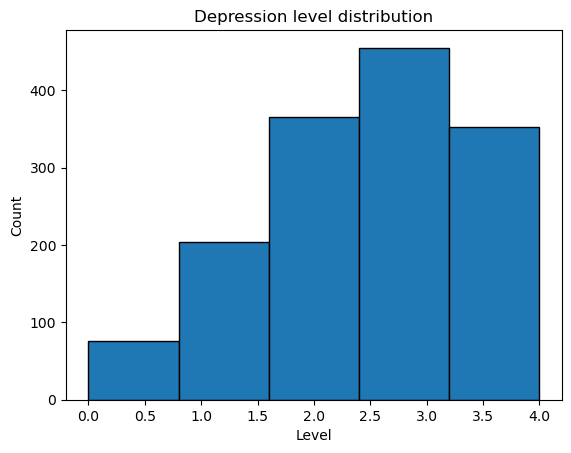

In [88]:
import matplotlib.pyplot as plt

plt.hist(y_bal, bins=5, ec='black')
plt.title('Depression level distribution')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [90]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}: {round(score, 5)}')

Nearest Neighbors: 0.19244
Linear SVM: 0.35052
RBF SVM: 0.33677


/Users/alorthius/anaconda3/envs/innovaid/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process: 0.34364
Decision Tree: 0.27491
Random Forest: 0.29553
Neural Net: 0.31959
AdaBoost: 0.30584
Naive Bayes: 0.23368
QDA: 0.27491


/Users/alorthius/anaconda3/envs/innovaid/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---